## Data : 
--> age

--> sex

--> chest pain type (4 values)

--> resting blood pressure

--> serum cholestoral in mg/dl

--> fasting blood sugar > 120 mg/dl

--> resting electrocardiographic results (values 0,1,2)

--> maximum heart rate achieved

--> exercise induced angina

--> oldpeak = ST depression induced by exercise relative to rest

--> the slope of the peak exercise ST segment

--> number of major vessels (0-3) colored by flourosopy

--> thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## Importing Libraries & getting Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('dataset/heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Handling Missing Values

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Correlation (Feature Engineering - Feature Selection)

In [6]:
data.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

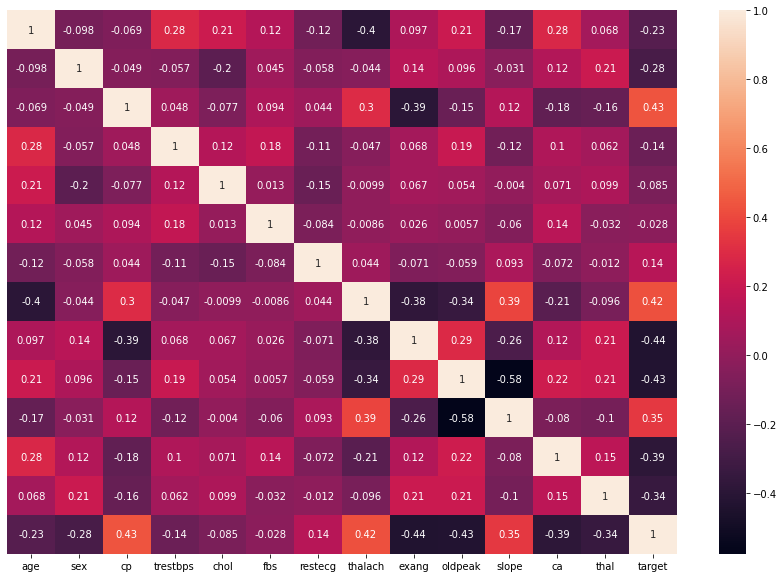

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr() ,annot=True ,yticklabels=False )
plt.show()

## Visualization

C:\Users\91959\AppData\Local\Temp/ipykernel_17948/1466431587.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  g = data.hist(ax=ax)


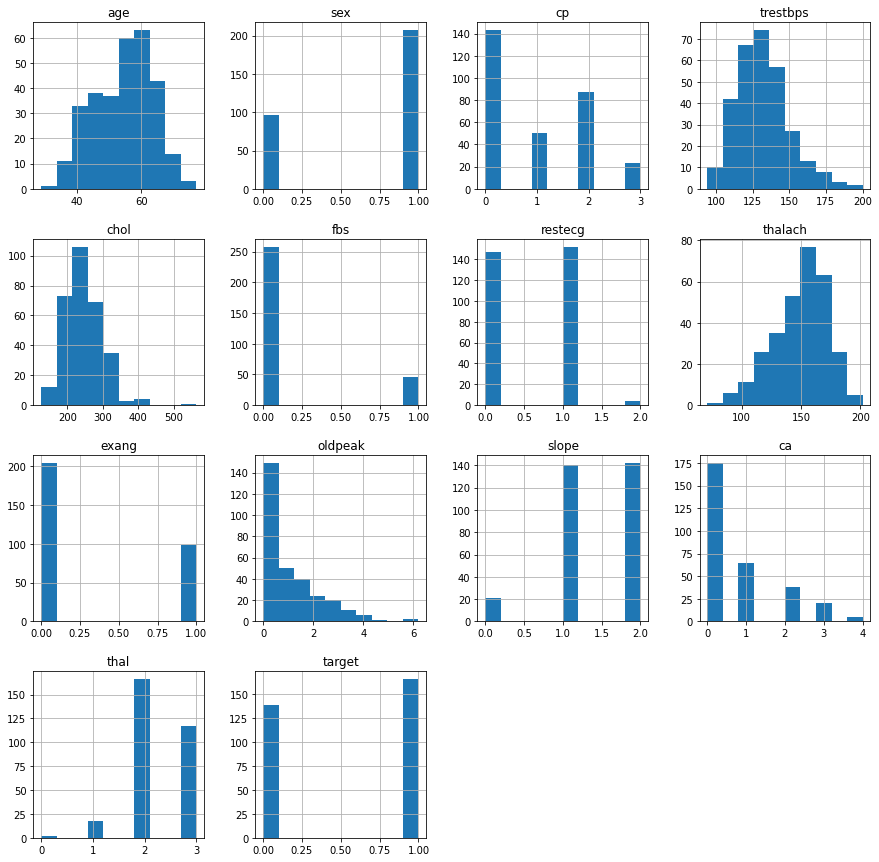

In [8]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
g = data.hist(ax=ax)

## Checking if Dataset is Balanced or not

In [9]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

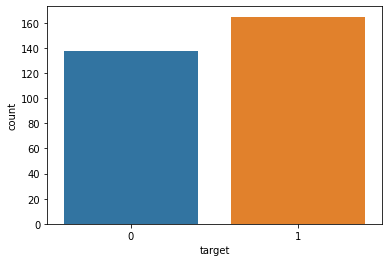

In [10]:
sns.countplot(x='target', data=data)


## Handling Categorical Features (Data-Preprocessing)

In [11]:
data = pd.get_dummies(data=data, columns=['sex', 'cp','fbs', 'restecg','exang', 'slope', 'ca', 'thal'])


In [12]:
data.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [14]:
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [15]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


## Selecting X & y

In [16]:
X = data.drop('target' ,axis=1)
y = data['target']

# Model Building

## KNN 

In [17]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score

# choosing best number of neighbors for our model
knn_scores = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(knn ,X ,y ,cv=15)
    knn_scores.append(round(cv_scores.mean() ,3))


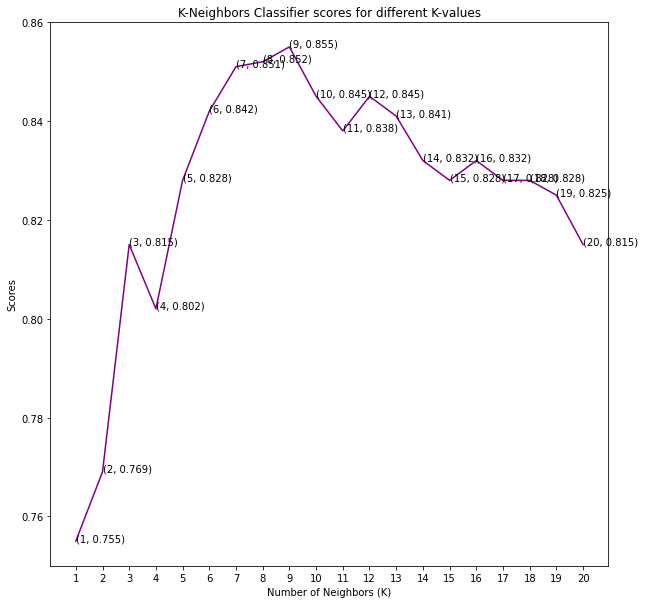

In [18]:
plt.figure(figsize=(10,10))
plt.plot([i for i in range(1,21)], knn_scores ,color='purple')

for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
    
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K-Neighbors Classifier scores for different K-values')
plt.show()

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=9)
cv_scores_knn = cross_val_score(knn_model ,X,y ,cv=15)

In [20]:
print('Accuracy of KNN model (with k=9) : {}'.format(round(cv_scores_knn.mean(),4)*100))

Accuracy of KNN model (with k=9) : 85.48


## Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier 

# Finding the best accuracy for decision tree algorithm using cross_val_score
dt_scores = []
for i in range(1,11):
    dt = DecisionTreeClassifier() 
    cv_scores = cross_val_score(dt ,X,y,cv=15)
    dt_scores.append(round(cv_scores.mean(),3))

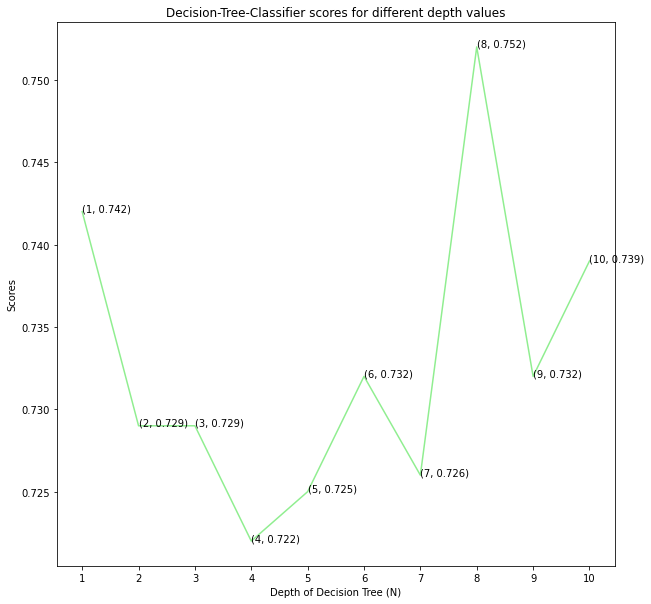

In [22]:
plt.figure(figsize=(10,10))
plt.plot([i for i in range(1, 11)], dt_scores, color='lightgreen')

for i in range(1, 11):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))

plt.xticks([i for i in range(1, 11)])
plt.xlabel('Depth of Decision Tree (N)')
plt.ylabel('Scores')
plt.title('Decision-Tree-Classifier scores for different depth values')
plt.show()

In [30]:
dt_model = DecisionTreeClassifier(max_depth=8)
cv_scores_dt = cross_val_score(dt_model ,X,y,cv=15)

In [31]:
print('Accuracy of Decision Tree model (with maxdepth=8) :{}'.format(round(cv_scores_dt.mean(), 4)*100))

Accuracy of Decision Tree model (with maxdepth=8) :72.52


## Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Finding the best accuracy for random forest algorithm using cross_val_score
rfc_scores = []

for i in range(10, 101, 10):
    rfc = RandomForestClassifier(n_estimators=i)
    cv_scores = cross_val_score(rfc, X, y, cv=5)
    rfc_scores.append(round(cv_scores.mean(), 3))


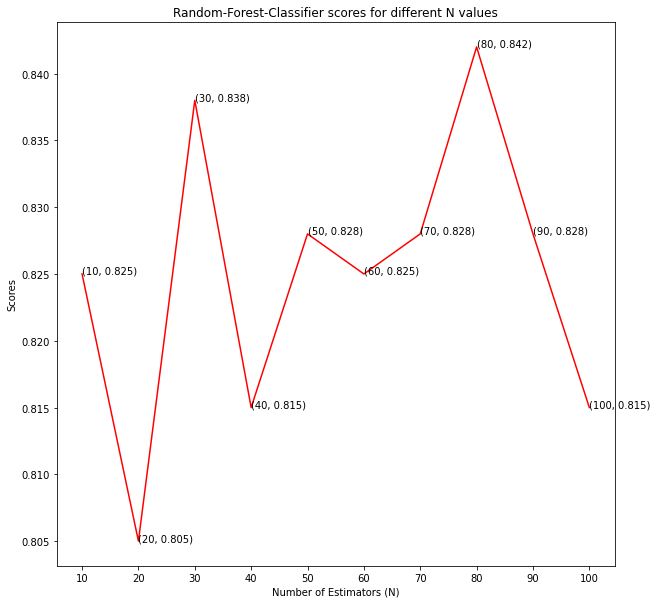

In [26]:
plt.figure(figsize=(10,10))

plt.plot([n for n in range(10, 101, 10)], rfc_scores, color='red')
for i in range(1, 11):
    plt.text(i*10, rfc_scores[i-1], (i*10, rfc_scores[i-1]))

plt.xticks([i for i in range(10, 101, 10)])
plt.xlabel('Number of Estimators (N)')
plt.ylabel('Scores')
plt.title('Random-Forest-Classifier scores for different N values')
plt.show()

In [32]:
rfc_model = RandomForestClassifier(n_estimators=80)
cv_scores_rfc = cross_val_score(dt_model, X, y, cv=15)

In [33]:
print('Accuracy of Random Forest model (with estimators=80) :{}'.format(round(cv_scores_rfc.mean(), 4)*100))

Accuracy of Random Forest model (with estimators=80) :71.89


# Model Evaluation 

In [34]:
# creating Dataframe to check which regression technique was the best

models = pd.DataFrame({
    'Model': ['KNN', 'Decision-Tree Classifier', 'Random-Forest Classifier'],
    'Accuracy': [
        round(cv_scores_knn.mean(), 4)*100,
        round(cv_scores_dt.mean(), 4)*100,
        round(cv_scores_rfc.mean(), 4)*100
        ]
    })

models.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy
0,KNN,85.48
1,Decision-Tree Classifier,72.52
2,Random-Forest Classifier,71.89
